In this notebook we see how image are represented as matrices of intensity values , and all transforms that can be done on them

We deal with grayscale here for simplicity

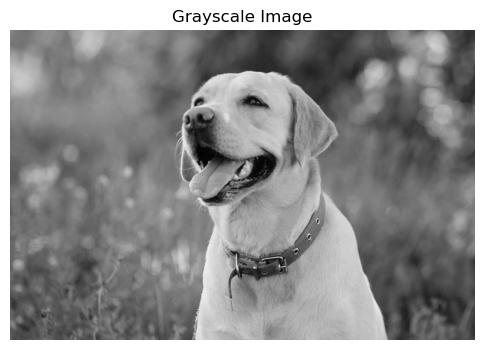

Grayscale Image as Matrix (partial view):
[[135 135 134 133 131 130 129 129 127 126]
 [135 135 134 132 131 130 129 129 127 125]
 [135 134 133 132 131 130 129 128 126 125]
 [134 134 133 132 131 129 129 128 126 125]
 [134 133 133 131 130 129 128 128 125 124]
 [134 133 132 131 130 129 128 127 125 124]
 [133 133 132 131 130 128 127 127 124 123]
 [133 133 132 131 129 128 127 127 124 123]
 [131 131 130 130 129 128 127 127 123 123]
 [130 130 129 128 128 127 126 126 123 122]]


In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load image
img_path = 'dog.jpeg'  # Replace with your image path
img = Image.open(img_path)

# Convert to grayscale
gray_img = img.convert('L')

# Convert to NumPy array (matrix form)
gray_array = np.array(gray_img)

# Show grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(gray_array, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# Show as matrix (print a part for readability)
print("Grayscale Image as Matrix (partial view):")
print(gray_array[:10, :10])  # Print top-left 10x10 corner


In [6]:
print("Shape of image array:", gray_array.shape)

Shape of image array: (667, 1000)


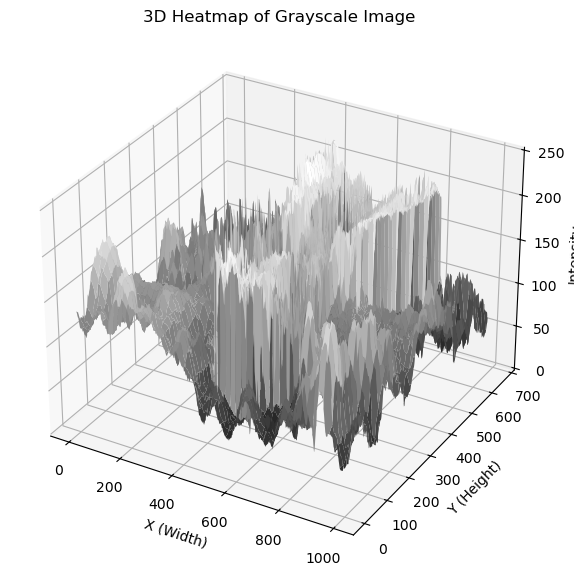

In [7]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D plotting)
from matplotlib import cm

# Create a meshgrid of X and Y coordinates
x = np.arange(gray_array.shape[1])
y = np.arange(gray_array.shape[0])
X, Y = np.meshgrid(x, y)

# Z values are the pixel intensities
Z = gray_array

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.gray, edgecolor='none')

ax.set_title('3D Heatmap of Grayscale Image')
ax.set_xlabel('X (Width)')
ax.set_ylabel('Y (Height)')
ax.set_zlabel('Intensity')
plt.show()


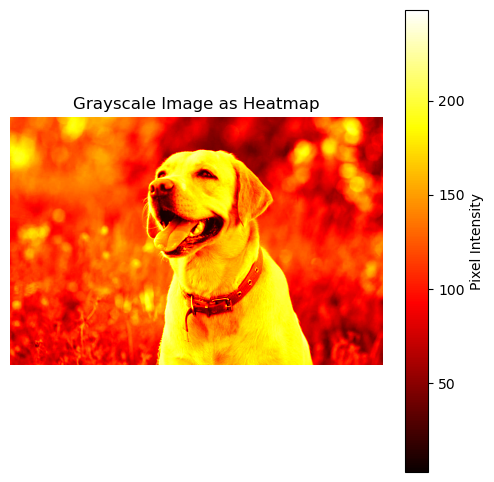

In [8]:
plt.figure(figsize=(6, 6))
plt.imshow(gray_array, cmap='hot')  # 'hot', 'jet', 'viridis', 'plasma', etc.
plt.colorbar(label='Pixel Intensity')
plt.title('Grayscale Image as Heatmap')
plt.axis('off')
plt.show()


Adding and subtracting intensiity values can give darkened or brightened images

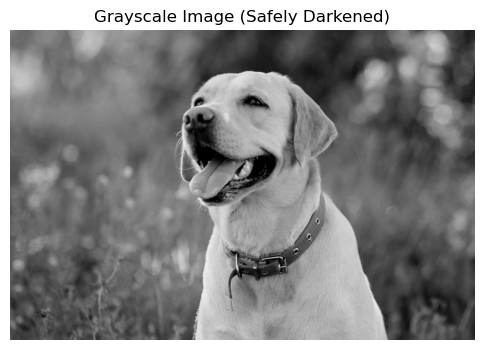

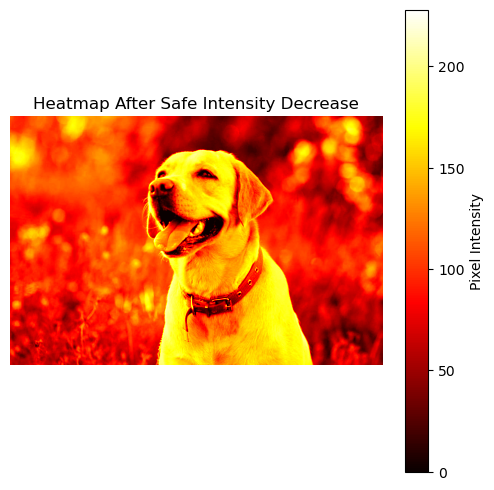

In [10]:
# Safely subtract 20 from grayscale image
temp_array = gray_array.astype(np.int16)
darker_array = np.clip(temp_array - 20, 0, 255).astype(np.uint8)

# Show darker image
plt.figure(figsize=(6, 6))
plt.imshow(darker_array, cmap='gray')
plt.title('Grayscale Image (Safely Darkened)')
plt.axis('off')
plt.show()

# Show as heatmap
plt.figure(figsize=(6, 6))
plt.imshow(darker_array, cmap='hot')
plt.colorbar(label='Pixel Intensity')
plt.title('Heatmap After Safe Intensity Decrease')
plt.axis('off')
plt.show()


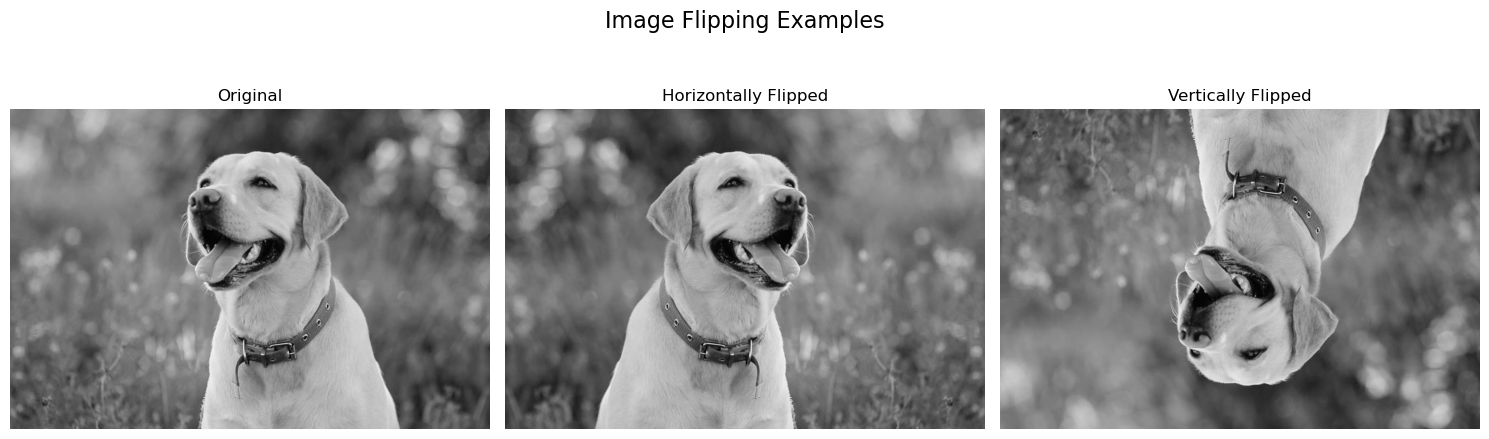

In [11]:
# Horizontal flip
flipped_horiz = np.fliplr(gray_array)

# Vertical flip
flipped_vert = np.flipud(gray_array)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(gray_array, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(flipped_horiz, cmap='gray')
axes[1].set_title("Horizontally Flipped")
axes[1].axis('off')

axes[2].imshow(flipped_vert, cmap='gray')
axes[2].set_title("Vertically Flipped")
axes[2].axis('off')

plt.suptitle("Image Flipping Examples", fontsize=16)
plt.tight_layout()
plt.show()


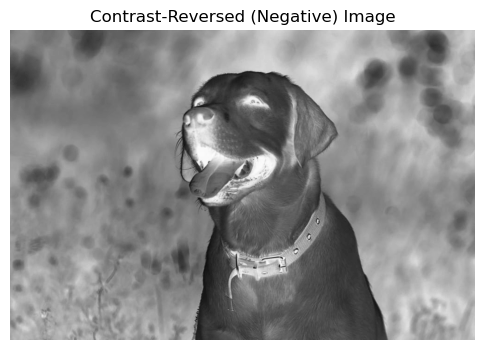

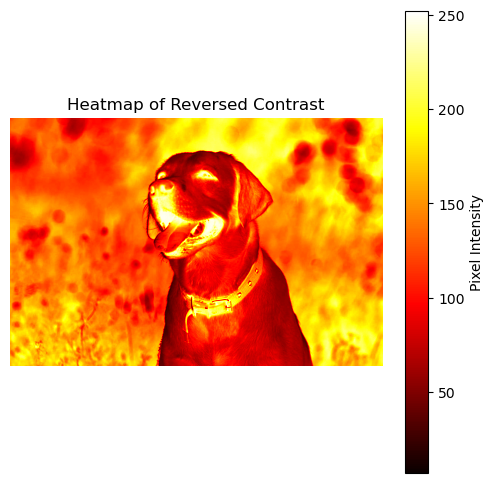

In [12]:
# Reverse contrast
inverted_array = 255 - gray_array

# Display inverted image
plt.figure(figsize=(6, 6))
plt.imshow(inverted_array, cmap='gray')
plt.title('Contrast-Reversed (Negative) Image')
plt.axis('off')
plt.show()

# Optional: Heatmap
plt.figure(figsize=(6, 6))
plt.imshow(inverted_array, cmap='hot')
plt.colorbar(label='Pixel Intensity')
plt.title('Heatmap of Reversed Contrast')
plt.axis('off')
plt.show()


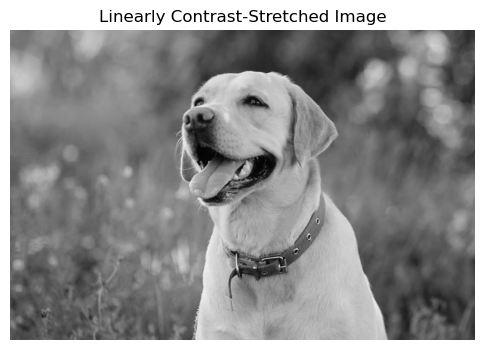

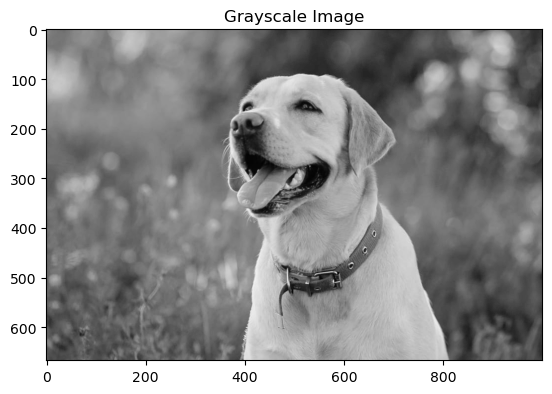

In [18]:
# Convert to float for accurate calculation
gray_float = gray_array.astype(np.float32)

# Get min and max
imin, imax = gray_float.min(), gray_float.max()

# Avoid division by zero
if imax != imin:
    stretched = ((gray_float - imin) / (imax - imin)) * 255
else:
    stretched = np.zeros_like(gray_float)

# Convert back to uint8
stretched = stretched.astype(np.uint8)

# Display stretched image
plt.figure(figsize=(6, 6))
plt.imshow(stretched, cmap='gray')

plt.title('Linearly Contrast-Stretched Image')
plt.axis('off')
plt.show()
plt.imshow(gray_array, cmap='gray')
plt.title('Grayscale Image')
plt.show()

Histogram Equalization : Done to improve visibility by changing contrast , we normalize the histogram . details later

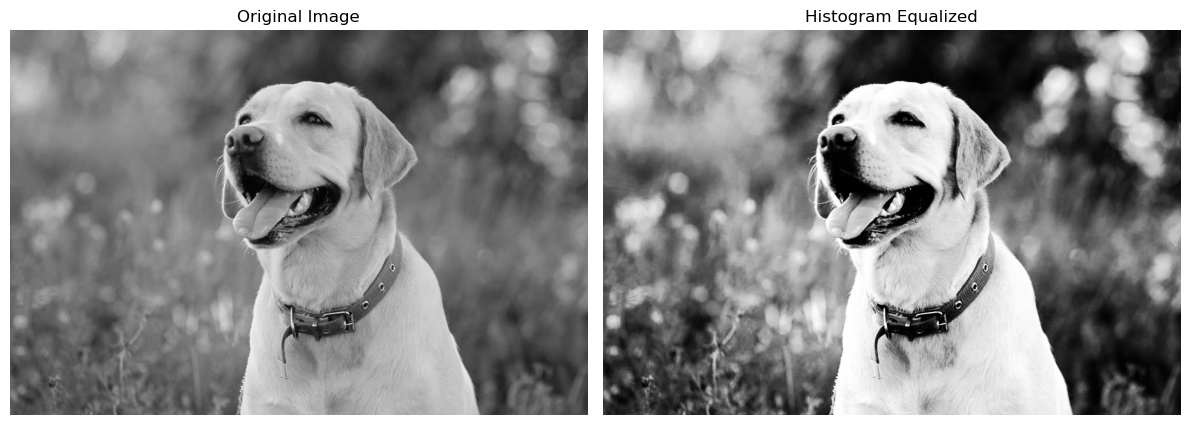

In [19]:
import cv2

# Use OpenCV for simple histogram equalization
equalized = cv2.equalizeHist(gray_array)

# Show original vs equalized
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(gray_array, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(equalized, cmap='gray')
axes[1].set_title("Histogram Equalized")
axes[1].axis('off')

plt.tight_layout()
plt.show()


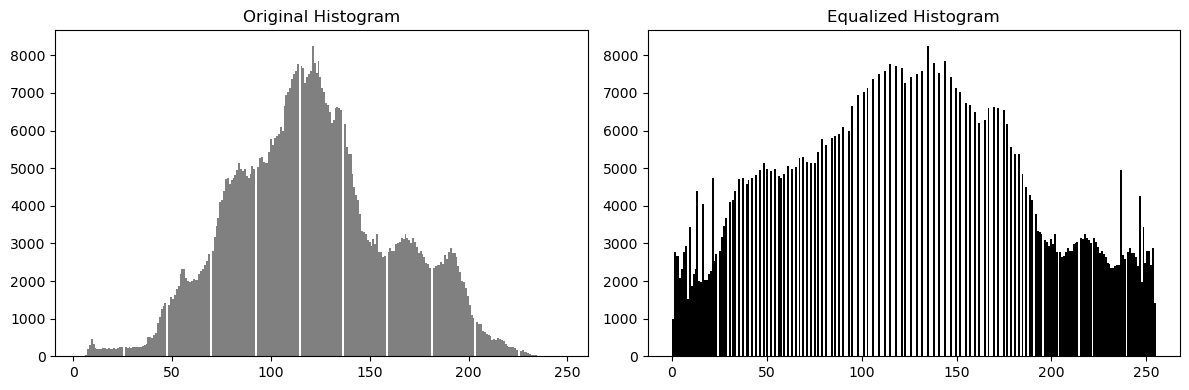

In [20]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(gray_array.ravel(), bins=256, color='gray')
plt.title('Original Histogram')

plt.subplot(1, 2, 2)
plt.hist(equalized.ravel(), bins=256, color='black')
plt.title('Equalized Histogram')

plt.tight_layout()
plt.show()


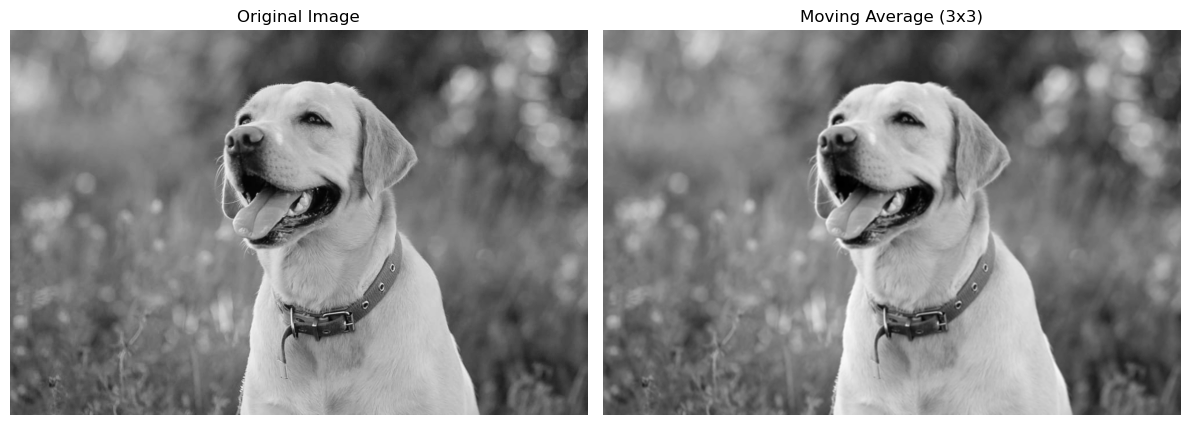

In [24]:
import cv2

# Apply 3x3 moving average filter
blurred = cv2.blur(gray_array, ksize=(3,3))

# Show original vs blurred
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(gray_array, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(blurred, cmap='gray')
axes[1].set_title('Moving Average (3x3)')
axes[1].axis('off')

plt.tight_layout()
plt.show()




Fourier transform : from the intensity domain to frequency domain

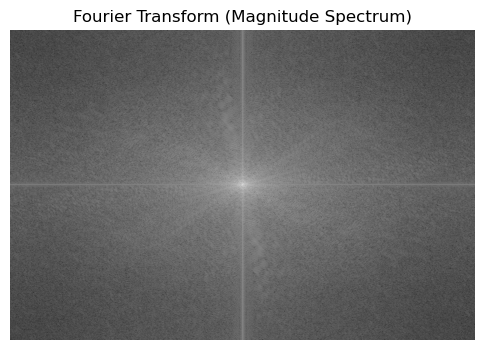

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the 2D FFT
f_transform = np.fft.fft2(gray_array)

# Shift zero frequency component to center
f_shifted = np.fft.fftshift(f_transform)

# Compute the magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(f_shifted) + 1)  # +1 avoids log(0)

# Plot the magnitude spectrum
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Transform (Magnitude Spectrum)')
plt.axis('off')
plt.show()


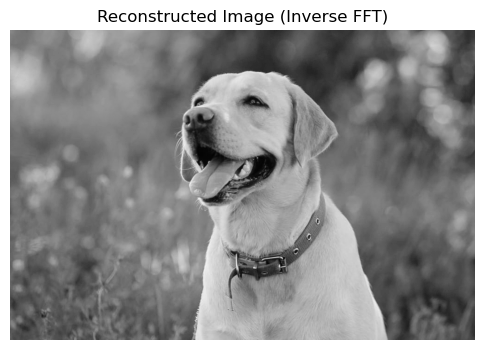

In [26]:
# Inverse shift and inverse FFT
f_ishifted = np.fft.ifftshift(f_shifted)
reconstructed = np.fft.ifft2(f_ishifted)
reconstructed = np.abs(reconstructed).astype(np.uint8)

# Show reconstructed image
plt.figure(figsize=(6, 6))
plt.imshow(reconstructed, cmap='gray')
plt.title('Reconstructed Image (Inverse FFT)')
plt.axis('off')
plt.show()
